# Understanding Central Limit Theorm

For any distribution of the random variable ‘X’ with a finite mean ‘μ’ and a finite variance ‘σ2’, the sampling distribution of the sample means is a gaussian distribution with a mean nearly equal to the population mean ‘μ’ and variance equal to ‘σ2/n’.
 
* CLT works always only for the populations with a finite mean and a finite variance. 
* The population distribution could either be gaussian or not, but sample size should be large, all the samples should be of the same size, and all the samples are picked with replacement. 
* Pareto Distribution is an example of a distribution with an infinite mean and an infinite variance. So CLT doesn’t work if the population distribution is pareto.
* CLT holds good for mean but not always for median and other statistics.

* <font color='red' size='3'>As you take more samples, especially the large ones, your graph of sample means will look more like a normal distribution</font>

For visual reference please refer below :

1. https://seeing-theory.brown.edu/probability-distributions/index.html#section2

2. http://www.ltcconline.net/greenl/java/Statistics/clt/cltsimulation.html

- you can generate multiple graphs and unserstand about CLT in above references.

## Import section

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
random.seed = 42
import warnings
warnings.filterwarnings("ignore")

import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from prettytable import PrettyTable
from IPython.display import HTML, display
plt.xkcd()

Output hidden; open in https://colab.research.google.com to view.

## Download dataset

In [2]:
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle.json
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04           8814        268  1.0              
thedevastator/mcdonalds-ice-cream-machines-broken-timeseries   McDonalds Ice Cream Machines Breaking - Timeseries  404KB  2022-09-14 23:51:09            780         34  1.0              
pantanjali/unemployment-dataset                                Unemployment dataset                                 17KB  2022-09-08 08:26:10           2092         68  1.0              
evangower/premier-league-match-

In [3]:
! kaggle datasets download -d sdolezel/black-friday
!unzip /content/black-friday.zip

 67% 5.00M/7.51M [00:00<00:00, 8.63MB/s]
100% 7.51M/7.51M [00:00<00:00, 12.8MB/s]
Archive:  /content/black-friday.zip
  inflating: test.csv                
  inflating: train.csv               


train.csv

The dataset here is a sample of the transactions made in a retail store on blackFriday

https://www.kaggle.com/datasets/sdolezel/black-friday


In [4]:
df = pd.read_csv('train.csv')
print("number of data points in our popultion:", df.shape)
print("% of missing values",df['Purchase'].isnull().sum() * 100 / len(df))
df.head(2)

number of data points in our popultion: (550068, 12)
% of missing values 0.0


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


Number of samples in our data:  550068


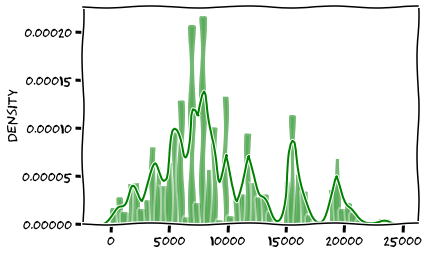

In [5]:
data = np.array(df['Purchase'].values)
print("Number of samples in our data: ",data.shape[0])
sns.distplot(data, color='g')
plt.show()
# population mean
population_mean = np.round(data.mean(),3)
# population std
population_std = np.round(data.std(),3)

Number of samples in our data:  550068


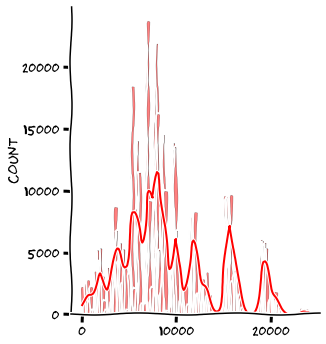

In [6]:
data = np.array(df['Purchase'].values)
print("Number of samples in our data: ",data.shape[0])
sns.displot(data, color='r', kde = True)
plt.show()
# population mean
population_mean = np.round(data.mean(),3)
# population std
population_std = np.round(data.std(),3)

In [7]:
def get_means_of_n_samples_with_m_size(data, n, m):
    sample_mean_m_samples_n_ele = []
    for i in range(0,n):
        samples = random.sample(range(0, data.shape[0]), m)
        sample_mean_m_samples_n_ele.append(data[samples].mean())
    return sample_mean_m_samples_n_ele

In [8]:
def central_limit_theorem(data, population_mean , i, j, color, key):
    sns.histplot(np.array(data), color=color, ax=axs[i, j])
    axs[i, j].axvline(population_mean, linestyle="--", color='r', label="p_mean")
    axs[i, j].axvline(np.array(data).mean(), linestyle="-.", color='b', label="s_mean")
    axs[i, j].set_title(key)
    axs[i, j].legend()

In [9]:
sample_means = dict()

In [10]:
sample_means['100samples_50ele'] = get_means_of_n_samples_with_m_size(data,100, 50)
sample_means['1000samples_50ele'] = get_means_of_n_samples_with_m_size(data,1000, 50)

sample_means['100samples_100ele'] = get_means_of_n_samples_with_m_size(data,100, 100)
sample_means['1000samples_100ele'] = get_means_of_n_samples_with_m_size(data,1000, 100)

sample_means['100samples_1000ele'] = get_means_of_n_samples_with_m_size(data,100, 1000)
sample_means['1000samples_1000ele'] = get_means_of_n_samples_with_m_size(data,1000, 1000)

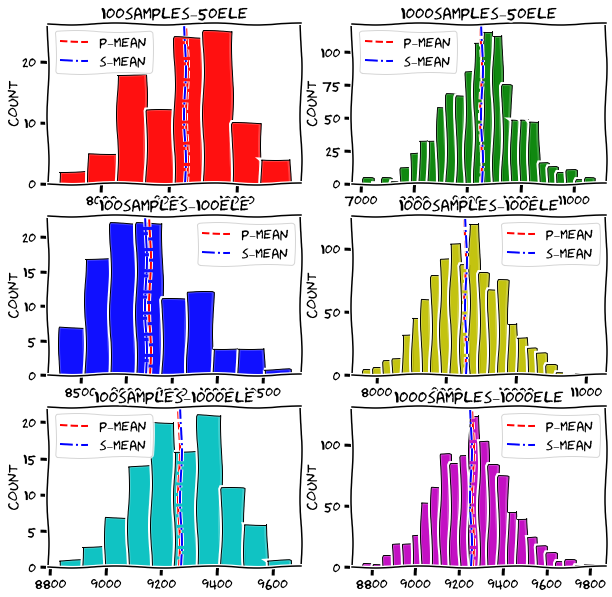

In [11]:
#red, green, blue, yellow, etc
colrs = ['r','g','b','y', 'c', 'm', 'k']
plt_grid  = [(0,0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
sample_sizes = [(100,50), (1000, 50), (100, 100), (1000, 100), (100, 1000), (1000, 1000)]

fig, axs = plt.subplots(3, 2,  figsize=(10, 10))
for i, key in enumerate(sample_means.keys()):
    central_limit_theorem(sample_means[key], population_mean , plt_grid[i][0], plt_grid[i][1] , colrs[i], key)
plt.show()

> _if we can observe the thrid row distribution plots, the larger the sample size, the more it looks like Gaussian_

__Note :__<br>
For the Central limit theorem to be valid, the samples have to be reasonably large. How large is that? It depends on how far the population distribution differs from a Gaussian distribution. Assuming the population doesn't have a really unusual distribution, a sample size of 10 or so is generally enough to invoke the Central Limit Theorem.

__ Let us get the properties of these sample distributions and compare these stats with the original distribution__

In [12]:
x = PrettyTable()
x = PrettyTable(["#samples_name", "P_Mean", "Sampel mean", "P_Std", "Sample Std", "mu_x"+u"\u2248"+"mu", "std_x"+u"\u2248"+"std/"+u"\u221A"+"n"])

for i, key in enumerate(sample_means.keys()):
    sample_mean = np.round(np.array(sample_means[key]).mean(), 3)
    sample_std = np.round(np.array(sample_means[key]).std(), 3)
    population_std_est = np.round(population_std/np.sqrt(sample_sizes[i][1]), 3)
    
    row = []
    row.append(key)
    row.append(population_mean)
    row.append(sample_mean)
    row.append(population_std)
    row.append(sample_std)
    row.append(str(sample_mean)+u"\u2248"+str(population_mean))
    row.append(str(sample_std)+u"\u2248"+str(population_std_est))
    x.add_row(row)
print(x)

+---------------------+----------+-------------+----------+------------+-------------------+-----------------+
|    #samples_name    |  P_Mean  | Sampel mean |  P_Std   | Sample Std |      mu_x≈mu      |   std_x≈std/√n  |
+---------------------+----------+-------------+----------+------------+-------------------+-----------------+
|   100samples_50ele  | 9263.969 |   9232.327  | 5023.061 |  699.021   | 9232.327≈9263.969 | 699.021≈710.368 |
|  1000samples_50ele  | 9263.969 |   9279.904  | 5023.061 |  688.781   | 9279.904≈9263.969 | 688.781≈710.368 |
|  100samples_100ele  | 9263.969 |   9222.349  | 5023.061 |  503.344   | 9222.349≈9263.969 | 503.344≈502.306 |
|  1000samples_100ele | 9263.969 |   9272.328  | 5023.061 |  521.938   | 9272.328≈9263.969 | 521.938≈502.306 |
|  100samples_1000ele | 9263.969 |   9272.03   | 5023.061 |  155.806   |  9272.03≈9263.969 | 155.806≈158.843 |
| 1000samples_1000ele | 9263.969 |   9256.334  | 5023.061 |  166.722   | 9256.334≈9263.969 | 166.722≈158.843 |
+

<strong><font color='green'>Observations:</font></strong>
1. If you check the above stats, we can observe the distribution of sample means, is having mean <font color='red'>$\mu_{x} \approx \mu$</font> and <font color='red'>$\sigma_{x}\approx \frac{\sigma}{\sqrt{n}}$</font>



<ul style="font-family:'Georgia';font-size:18px" >
<strong>Central Limit Theorem says: </strong>
<br>
<br>
<li>
The sampling distribution of the sample mean <font color='red'>$\overline{X}$</font>  is approximately normally distributed with mean <font color='red'>$\mu$</font> and standard deviation <font color='red'>$\frac{\sigma}{\sqrt{n}}$</font>. if the original distributions are non-normal.
</li>
<br>
<li>
The larger the sample size <font color='red'>$n$</font> is, the more normally distributed the sampling distribution will be and the more tightly it will converge about the true population mean <font color='red'>$\mu$</font>.
</li>
<br>
<li>
The sampling distribution of the sample mean <font color='red'>$\overline{X}$</font> is exactly normally distributed with mean <font color='red'>$\mu$</font> and standard deviation <font color='red'>$\frac{\sigma}{\sqrt{n}}$</font> if the original distributions are normal.</li>
</ul>